# MSBD 5001 Spring 2022 Individual Project

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
# Extract dataset
data_df_original = pd.read_csv("train.csv",index_col=0)
data_df_test = pd.read_csv("test.csv",index_col=0)
data_df = data_df_original.copy()
data_attribute = data_df.columns.values.tolist()
print(data_attribute)

['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)', 'CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)', 'NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)', 'Age', 'Sex 0M1F', 'Mono CD64+MFI (cells/ul)', 'label']


In [3]:
# Check empty rows
data_null_info = data_df.isnull().sum()
print(data_null_info)

MO HLADR+ MFI (cells/ul)    1
Neu CD64+MFI (cells/ul)     1
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    1
label                       0
dtype: int64


In [4]:
# Use Median to fill in the empty entries
median_col2 = data_df["MO HLADR+ MFI (cells/ul)"].median()
median_col3 = data_df["Neu CD64+MFI (cells/ul)"].median()
median_col12 = data_df["Mono CD64+MFI (cells/ul)"].median()

data_df["MO HLADR+ MFI (cells/ul)"]= data_df["MO HLADR+ MFI (cells/ul)"].fillna(median_col2)
data_df["Neu CD64+MFI (cells/ul)"]= data_df["Neu CD64+MFI (cells/ul)"].fillna(median_col3)
data_df["Mono CD64+MFI (cells/ul)"]= data_df["Mono CD64+MFI (cells/ul)"].fillna(median_col12)

data_null_info = data_df.isnull().sum()
print(data_null_info)

MO HLADR+ MFI (cells/ul)    0
Neu CD64+MFI (cells/ul)     0
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    0
label                       0
dtype: int64


### Extract Training and Validation Dataset

In [5]:
# Extract Training and Validation Dataset
X = data_df.drop(["label"], axis=1)
y = data_df["label"]
# Extract Testing Dataset
X_test = data_df_test.copy()

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3,random_state=100)
print(len(X_train))
print(len(X_validation))

60
27


### Training and Validation Stage

##### Random Forest Classifiers

Number of Estimators: 50
validation accuracy: 0.8888888888888888


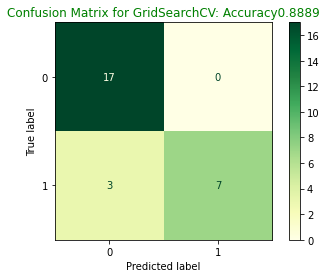

In [6]:
#######################################
# Random Forest Classifiers
#######################################
tuned_parameters = [{'n_estimators': [10,20,30,40,50,60,70,80,90,100]}]

# Determine best n_estimator 
clf_grid = GridSearchCV(RandomForestClassifier(random_state=20), tuned_parameters, cv=5,scoring='accuracy')
clf_grid.fit(X_train.values, y_train.values)

# Training RandomForest with best n_estimator
clf_model_randomforest = RandomForestClassifier(max_depth=100, n_estimators=clf_grid.best_params_["n_estimators"],
                               criterion= "gini",random_state=20)
clf_model_randomforest.fit(X_train.values, y_train.values)

# Validate RandomForest with Validation dataset
predict_y_validation = clf_model_randomforest.predict(X_validation.values)
accuracy_score_results = accuracy_score(y_validation.values, predict_y_validation)
print("Number of Estimators:",clf_grid.best_params_["n_estimators"] )
print("validation accuracy:", accuracy_score_results)

#########################################
### Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation.values, predict_y_validation, cmap='YlGn')
plt.title("""Confusion Matrix for GridSearchCV: Accuracy{:.4}""".format(accuracy_score_results),color='green')
plt.show()

### Testing Stage

In [7]:
#### Generate Test Prediction 
Y_test_prediction_randomforest = clf_model_randomforest.predict(X_test.values).tolist()

### Generate Submission csv from the RandomForest Classifier Test Prediction

In [8]:
y_id_list = X_test.index.tolist()

test_df = pd.DataFrame({"id":y_id_list, "label":Y_test_prediction_randomforest})
test_df.to_csv("submission.csv",index=False)